## Case Study

Adapted from Adhikari and DeNero in [Inferential Thinking](https://www.inferentialthinking.com/chapters/intro.html) Chapter 1.3

### Step 1 (Formulate a Question)

We want to understand text as data. For example 

 * How does textual data provide information about novels?
 
We will look at tow novels

* Huckleberry Finn by Mark Twain 
* Little Women by Louisa May Alcott

Books published before 1923 are currently in the public domain. We can access them from the Project Gutenberg website. 

### Step 2 (Gather and Format the Data)

In [1]:
# Importing packages

import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests

from sklearn.linear_model import LinearRegression

import os
import warnings
warnings.simplefilter(action="ignore")

We can access the data from the internet. Using the `requests` package we can send a request to the website specified by its url (uniform resource locator). 

In [2]:
# Acquire data 

huck_finn_url = "http://www.gutenberg.org/files/76/76-0.txt"
huck_finn_binary = requests.get(huck_finn_url).content

Note that the response to the request is a collection of numbers. The numbesrs are in binary format instead of decimal format. 

In [3]:
# Binary format

" ".join(format(x,'b') for x in huck_finn_binary[:100])

'11101111 10111011 10111111 1101 1010 1010100 1101000 1100101 100000 1010000 1110010 1101111 1101010 1100101 1100011 1110100 100000 1000111 1110101 1110100 1100101 1101110 1100010 1100101 1110010 1100111 100000 1000101 1000010 1101111 1101111 1101011 100000 1101111 1100110 100000 1000001 1100100 1110110 1100101 1101110 1110100 1110101 1110010 1100101 1110011 100000 1101111 1100110 100000 1001000 1110101 1100011 1101011 1101100 1100101 1100010 1100101 1110010 1110010 1111001 100000 1000110 1101001 1101110 1101110 101100 100000 1000011 1101111 1101101 1110000 1101100 1100101 1110100 1100101 1101 1010 1100010 1111001 100000 1001101 1100001 1110010 1101011 100000 1010100 1110111 1100001 1101001 1101110 100000 101000 1010011 1100001 1101101 1110101 1100101 1101100 100000'

From the website, we find that the text encoding shoul be `UTF-8` meaning 8-bit Unicode Transformation Format. While text can be represented with numbers in many ways, UTF-8 is common. It allows for encoding of all 1,112,064 valid binary points in Unicode using one to four bytes.

In [4]:
# Convert from binary format to utf-8 format

huck_finn_utf8 = huck_finn_binary.decode(encoding='utf-8')

In [5]:
huck_finn_utf8[:91]

'\ufeff\r\nThe Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete\r\nby Mark Twain ('

Note that we have many special characters. Remember that the back-slash indicate a special character. The special characters for formatting are 

* \r
* \t
* \n
* \v
* \f

Note that regular expressions allow us to capture these through \s. We use the `re` package.


In [6]:
# Remove white space

huck_finn_text = re.sub(r'\s+', ' ', huck_finn_utf8)

In [7]:
huck_finn_text[:88]

'\ufeff The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete by Mark Twain '

In [8]:
# Save file

with open("huck_finn.txt","w+") as file_handle: 
        file_handle.write(huck_finn_text[1:])

We should record these steps in a function. Remember that we try to record everything we do to make the steps reproducible.

In [9]:
# Utility function to get data from website

def read_url(url): 
    return re.sub(r'\s+', ' ', requests.get(url).content.decode(encoding='utf-8'))

In [10]:
# Get request for text file on website 

# little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_url =  "http://www.gutenberg.org/ebooks/514.txt.utf-8"
little_women_text = read_url(little_women_url)

with open("little_women.txt","w") as file_handle: 
        file_handle.write(little_women_text[1:])

### Step 3 (Summarize and Visualize the Data)

##### Create Tables from the Data

Before we read the file from memory, we should check the file size

In [ ]:
# check the file sizes

!du -sh "huck_finn.txt"

In [11]:
with open("huck_finn.txt","r") as fh_huck_finn: 
    huck_finn_text = fh_huck_finn.read()

Note that we have a string containing the contents of the books

In [12]:
huck_finn_text[:100]

' The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete by Mark Twain (Samuel Cleme'

So we should split into chapters

In [13]:
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

We can do the same for the other novel.

In [14]:
# check the file sizes

!du -sh "little_women.txt"

'du' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
with open("little_women.txt","r") as fh_little_women: 
    little_women_text = fh_little_women.read()
    
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

Now we can make two series where 

* index is chapter of novel 
* value is string containing the text in the chapter

In [17]:
# Display the chapters of Huckleberry Finn as table

df_huck_finn = pd.Series(data=huck_finn_chapters, index=np.arange(1,len(huck_finn_chapters)+1))
df_huck_finn.head(10)

1     I. YOU don't know about me without you have re...
2     II. WE went tiptoeing along a path amongst the...
3     III. WELL, I got a good going-over in the morn...
4     IV. WELL, three or four months run along, and ...
5     V. I had shut the door to. Then I turned aroun...
6     VI. WELL, pretty soon the old man was up and a...
7     VII. “GIT up! What you 'bout?” I opened my eye...
8     VIII. THE sun was up so high when I waked that...
9     IX. I wanted to go and look at a place right a...
10    X. AFTER breakfast I wanted to talk about the ...
dtype: object

In [18]:
# Display the chapters of Little Women as table

df_little_women = pd.Series(data=little_women_chapters, 
                            index=np.arange(1,len(little_women_chapters)+1))
df_little_women.head(10)

1     ONE PLAYING PILGRIMS "Christmas won't be Chris...
2     TWO A MERRY CHRISTMAS Jo was the first to wake...
3     THREE THE LAURENCE BOY "Jo! Jo! Where are you?...
4     FOUR BURDENS "Oh, dear, how hard it does seem ...
5     FIVE BEING NEIGHBORLY "What in the world are y...
6     SIX BETH FINDS THE PALACE BEAUTIFUL The big ho...
7     SEVEN AMY'S VALLEY OF HUMILIATION "That boy is...
8     EIGHT JO MEETS APOLLYON "Girls, where are you ...
9     NINE MEG GOES TO VANITY FAIR "I do think it wa...
10    TEN THE P.C. AND P.O. As spring came on, a new...
dtype: object

##### Generate Line-Charts

In [19]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

def count_name(some_pattern, some_string):
    return len(re.findall(some_pattern, some_string))

In [20]:
hf_counts = pd.DataFrame(data = {
        'Jim': [count_name(r"Jim", huck_finn_chapter) for huck_finn_chapter in huck_finn_chapters],
        'Tom': [count_name(r"Tom", huck_finn_chapter) for huck_finn_chapter in huck_finn_chapters],
        'Huck': [count_name(r"Huck", huck_finn_chapter) for huck_finn_chapter in huck_finn_chapters]})

In [21]:
hf_counts.head()

,Jim,Tom,Huck
0,0,6,3
1,16,24,2
2,0,5,2
3,8,0,1
4,0,0,0


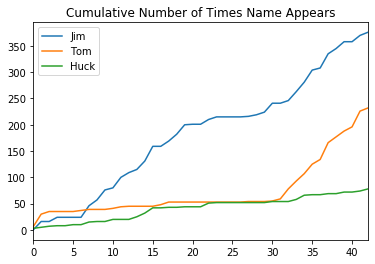

In [22]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cumul_counts = hf_counts.cumsum() 
cumul_counts.plot()
plt.title('Cumulative Number of Times Name Appears');

In [23]:
# Counts of names in the chapters of Little Women

people = [r'Amy', r'Beth', r'Jo', r'Laurie', r'Meg']

people_counts = {pp: [count_name(pp, little_women_chapter) for little_women_chapter in little_women_chapters] for pp in people}

lw_counts = pd.DataFrame(data=people_counts)

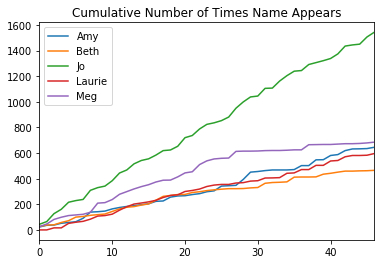

In [24]:
# Plot the cumulative counts

cumul_counts = lw_counts.cumsum()
cumul_counts.plot()
plt.title('Cumulative Number of Times Name Appears');

### Step 3 Continued (Explore the Data to Find Patterns)

_**Relationship between amount of punctuation and length of chapter**_

In [25]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

punctuation = r'\.'

hf_length_punctuation = pd.DataFrame({
        'HF Chapter Length': [len(s) for s in huck_finn_chapters],
        'Number of Periods': [count_name(punctuation, huck_finn_chapter) for huck_finn_chapter in huck_finn_chapters]
    })

lw_length_punctuation = pd.DataFrame({
        'LW Chapter Length': [len(s) for s in little_women_chapters],
        'Number of Periods': [count_name(punctuation, little_women_chapter) for little_women_chapter in little_women_chapters]
    })

In [26]:
# The counts for Huckleberry Finn

hf_length_punctuation.head(10)

,HF Chapter Length,Number of Periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91
5,14550,125
6,13218,127
7,22208,249
8,8081,71
9,7036,70


In [27]:
# The counts for Little Women

lw_length_punctuation.head(10)

,LW Chapter Length,Number of Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
5,14622,140
6,14431,131
7,22476,214
8,33767,337
9,18507,185


In [28]:
hf_X, hf_y = hf_length_punctuation.iloc[:,1].as_matrix().reshape(-1,1), hf_length_punctuation.iloc[:,0].as_matrix().reshape(-1,1)
lw_X, lw_y = lw_length_punctuation.iloc[:,1].as_matrix().reshape(-1,1), lw_length_punctuation.iloc[:,0].as_matrix().reshape(-1,1)

hf_reg = LinearRegression().fit(hf_X, hf_y)
lw_reg = LinearRegression().fit(lw_X, lw_y)


In [29]:
xaxis = np.linspace(0,400,1000)
hf_yaxis = hf_reg.coef_[0][0] * xaxis + hf_reg.intercept_[0]
lw_yaxis = lw_reg.coef_[0][0] * xaxis + lw_reg.intercept_[0]

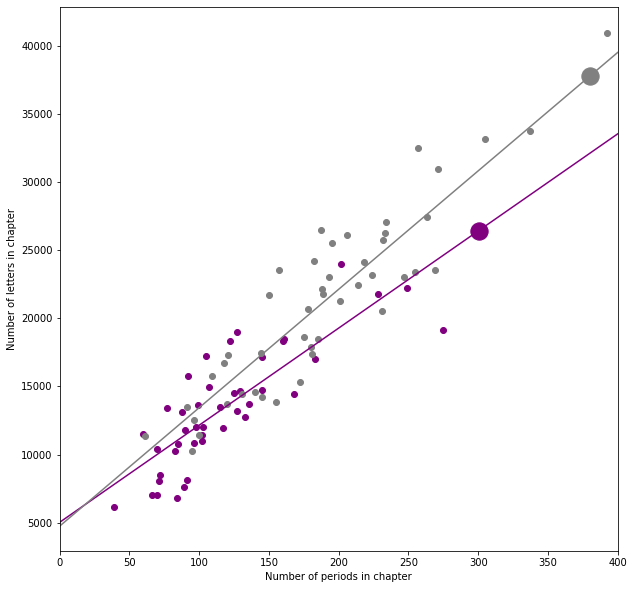

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(hf_length_punctuation.iloc[:,1], hf_length_punctuation.iloc[:,0], color='purple')
plt.scatter(lw_length_punctuation.iloc[:,1], lw_length_punctuation.iloc[:,0], color='grey')
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of letters in chapter')
plt.xlim(0,400)
plt.plot(xaxis, hf_yaxis, color="purple")
plt.scatter(xaxis[750], hf_yaxis[750],color="purple",s=300)
plt.plot(xaxis, lw_yaxis, color="grey")
plt.scatter(xaxis[950], lw_yaxis[950],color="grey",s=300);

Recall that slope is $$\displaystyle\frac{\Delta y}{\Delta x}$$ How can we interpret the slope of the lines?

_**Distinguishing between novels by length of words**_

In [31]:
huck_finn_word_length = list(map(lambda x: len(x.strip()), 
                                 (" ".join(huck_finn_chapters)).split(' ')))


little_women_word_length = list(map(lambda x: len(x.strip()), 
                                 (" ".join(little_women_chapters)).split(' ')))


df_huck_finn_word_length = pd.DataFrame(columns=['Huck Finn'],
                                           data=pd.Series(data=huck_finn_word_length).value_counts().sort_index()[1:21], index=np.arange(1,21))


df_little_women_word_length = pd.DataFrame(columns=['Little Women'],
                                           data=pd.Series(data=little_women_word_length).value_counts().sort_index()[1:21], index=np.arange(1,21))

df_merged = pd.merge(df_huck_finn_word_length.div(df_huck_finn_word_length.sum()), 
                     df_little_women_word_length.div(df_little_women_word_length.sum()), 
                     how='outer', 
                     left_index=True,
                    right_index=True)

In [32]:
df_little_women_word_length.head(3)

,Little Women
1,7139
2,28049
3,45460


In [33]:
df_huck_finn_word_length.head(3)

,Huck Finn
1,6000
2,18154
3,28809


In [34]:
df_merged.head(3)

,Huck Finn,Little Women
1,0.053150,0.037822
2,0.160814,0.148603
3,0.255200,0.240846


### Step 1 Continued (Formulate a Question)

The log-log plots of rank versus frequency suggest a pattern 

$$\large \text{Frequency} = \displaystyle\frac{0.17}{\text{Rank}^{0.85}}$$

This pattern of frequency and rank is called the Zipf rule. How common is it?

In [35]:
df_huck_finn_word_length['Frequency'] = df_huck_finn_word_length['Huck Finn'].div(df_huck_finn_word_length['Huck Finn'].sum())

In [36]:
df_huck_finn_word_length

,Huck Finn,Frequency
1,6000,0.053150
2,18154,0.160814
3,28809,0.255200
4,21145,0.187310
5,14628,0.129580
6,10003,0.088610
7,6105,0.054080
8,3350,0.029675
9,1820,0.016122
10,1167,0.010338


In [37]:
temp = df_huck_finn_word_length.sort_values(by='Huck Finn', ascending=False).reset_index()

temp.index = temp.index + 1

temp.rename(columns={'index':'Length'})



,Length,Huck Finn,Frequency
1,3,28809,0.255200
2,4,21145,0.187310
3,2,18154,0.160814
4,5,14628,0.129580
5,6,10003,0.088610
6,7,6105,0.054080
7,1,6000,0.053150
8,8,3350,0.029675
9,9,1820,0.016122
10,10,1167,0.010338


In [41]:
temp['Zipf'] = \
0.17 / (temp.index**0.85)

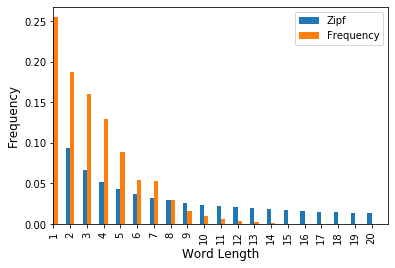

In [42]:
# df_huck_finn_word_length
temp[['Zipf','Frequency']].plot(kind='bar')
plt.xlim(xmin=0, xmax = 20)
plt.gca().set_xlabel("Word Length", fontsize=12)
plt.gca().set_ylabel("Frequency", fontsize=12)
plt.plot();